In [2]:
from pathlib import Path
import pandas as pd
import json

In [3]:
dataset_path = Path("/mnt/i/bio/mave_curation/Findlay_BRCA1_SGE/")

In [4]:
data = pd.read_csv(dataset_path / "raw" / "urn_mavedb_00000097-0-1_scores.csv")

In [5]:
data = data[~data.hgvs_pro.isna()]

In [6]:
data[data.hgvs_pro.duplicated(keep=False)].sort_values("hgvs_pro")

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,score_rep1,score_rep2,score_rna,score_rna_rep1,score_rna_rep2,mavedb_clnsig,mavedb_clnrevstat
2952,urn:mavedb:00000097-0-1#2953,g.53128T>A,NM_007294.3:c.4923T>A,NP_009225.1:p.Ala1641=,-0.579607,-0.319293,-0.839922,0.137693,0.115135,0.227550,NaN,NaN
2951,urn:mavedb:00000097-0-1#2952,g.53128T>C,NM_007294.3:c.4923T>C,NP_009225.1:p.Ala1641=,-0.152310,0.008261,-0.312881,0.263970,0.121116,0.442360,NaN,NaN
2950,urn:mavedb:00000097-0-1#2951,g.53128T>G,NM_007294.3:c.4923T>G,NP_009225.1:p.Ala1641=,-0.446852,-0.472295,-0.421410,0.134980,-0.156061,0.406684,Likely_benign,reviewed_by_expert_panel
2240,urn:mavedb:00000097-0-1#2241,g.56444C>T,NM_007294.3:c.5007C>T,NP_009225.1:p.Ala1669=,-1.033435,-0.943894,-1.122976,-2.172297,-2.262414,-2.052227,Likely_benign,reviewed_by_expert_panel
2241,urn:mavedb:00000097-0-1#2242,g.56444C>G,NM_007294.3:c.5007C>G,NP_009225.1:p.Ala1669=,-0.334289,-0.152296,-0.516283,0.004999,0.230777,-0.171788,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2769,urn:mavedb:00000097-0-1#2770,g.19199T>C,NM_007294.3:c.249T>C,NP_009225.1:p.Val83=,0.101223,0.046437,0.156008,0.265430,0.282364,0.150441,Likely_benign,reviewed_by_expert_panel
2770,urn:mavedb:00000097-0-1#2771,g.19199T>A,NM_007294.3:c.249T>A,NP_009225.1:p.Val83=,-0.098429,-0.020627,-0.176231,0.263588,0.378698,-0.419769,NaN,NaN
3702,urn:mavedb:00000097-0-1#3703,g.46T>G,NM_007294.3:c.24T>G,NP_009225.1:p.Val8=,-0.543138,-0.240299,-0.845976,0.160832,0.364373,0.012396,NaN,NaN
3704,urn:mavedb:00000097-0-1#3705,g.46T>A,NM_007294.3:c.24T>A,NP_009225.1:p.Val8=,0.014281,-0.267846,0.296408,0.299777,0.442275,0.212561,NaN,NaN


In [7]:
data = data.assign(hgvs_pro=data.hgvs_pro.str.split(":").str[1])

In [8]:
data

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,score_rep1,score_rep2,score_rna,score_rna_rep1,score_rna_rep2,mavedb_clnsig,mavedb_clnrevstat
0,urn:mavedb:00000097-0-1#1,g.78414A>T,NM_007294.3:c.5565A>T,p.Ile1855=,-0.015322,-0.116153,0.085509,-0.403450,-0.160708,-0.482648,NaN,NaN
1,urn:mavedb:00000097-0-1#2,g.78414A>G,NM_007294.3:c.5565A>G,p.Ile1855Met,0.021941,0.174501,-0.130620,-0.289526,0.404663,-1.054867,NaN,NaN
2,urn:mavedb:00000097-0-1#3,g.78414A>C,NM_007294.3:c.5565A>C,p.Ile1855=,0.231183,0.151333,0.311032,0.207660,0.410202,0.168734,Likely_benign,reviewed_by_expert_panel
3,urn:mavedb:00000097-0-1#4,g.78413T>G,NM_007294.3:c.5564T>G,p.Ile1855Arg,-0.464328,-0.140845,-0.787812,0.343402,1.098202,-0.569539,NaN,NaN
4,urn:mavedb:00000097-0-1#5,g.78413T>C,NM_007294.3:c.5564T>C,p.Ile1855Thr,-0.291519,-0.477009,-0.106029,0.303770,0.111163,0.567510,Uncertain_significance,"criteria_provided,_single_submitter"
...,...,...,...,...,...,...,...,...,...,...,...,...
3888,urn:mavedb:00000097-0-1#3889,g.62G>T,NM_007294.3:c.40G>T,p.Val14Phe,-1.431762,-0.862572,-2.000952,-0.078645,-0.058883,-0.056970,NaN,NaN
3889,urn:mavedb:00000097-0-1#3890,g.62G>C,NM_007294.3:c.40G>C,p.Val14Leu,-0.548240,-0.786330,-0.310150,-0.200813,-0.447517,0.007455,NaN,NaN
3890,urn:mavedb:00000097-0-1#3891,g.62G>A,NM_007294.3:c.40G>A,p.Val14Ile,-0.006564,-0.143607,0.130478,-0.288900,-0.540019,-0.077999,NaN,NaN
3891,urn:mavedb:00000097-0-1#3892,g.61T>G,NM_007294.3:c.39T>G,p.Asn13Lys,-0.299075,-0.461439,-0.136711,-0.068298,-0.003306,-0.084739,NaN,NaN


In [13]:
aggregated_data = data.groupby("hgvs_pro").score.mean().reset_index()

In [14]:
aggregated_data

,hgvs_pro,score
0,p.Ala1641=,-0.392923
1,p.Ala1641Asp,0.441891
2,p.Ala1641Gly,-0.288385
3,p.Ala1641Pro,-0.287474
4,p.Ala1641Ser,-0.927134
...,...,...
2246,p.Val8Asp,-1.121676
2247,p.Val8Gly,-0.312289
2248,p.Val8Ile,-0.560919
2249,p.Val8Leu,-0.448267


In [15]:
aggregated_data.to_csv(dataset_path / "scoreset.csv", index=False)

In [9]:
metadata = dict(uniprot_acc='P38398')
with open(dataset_path / "metadata.json", "w") as f:
    json.dump(metadata, f)

In [5]:
import joblib
observations = joblib.load(dataset_path / 'observations.pkl')

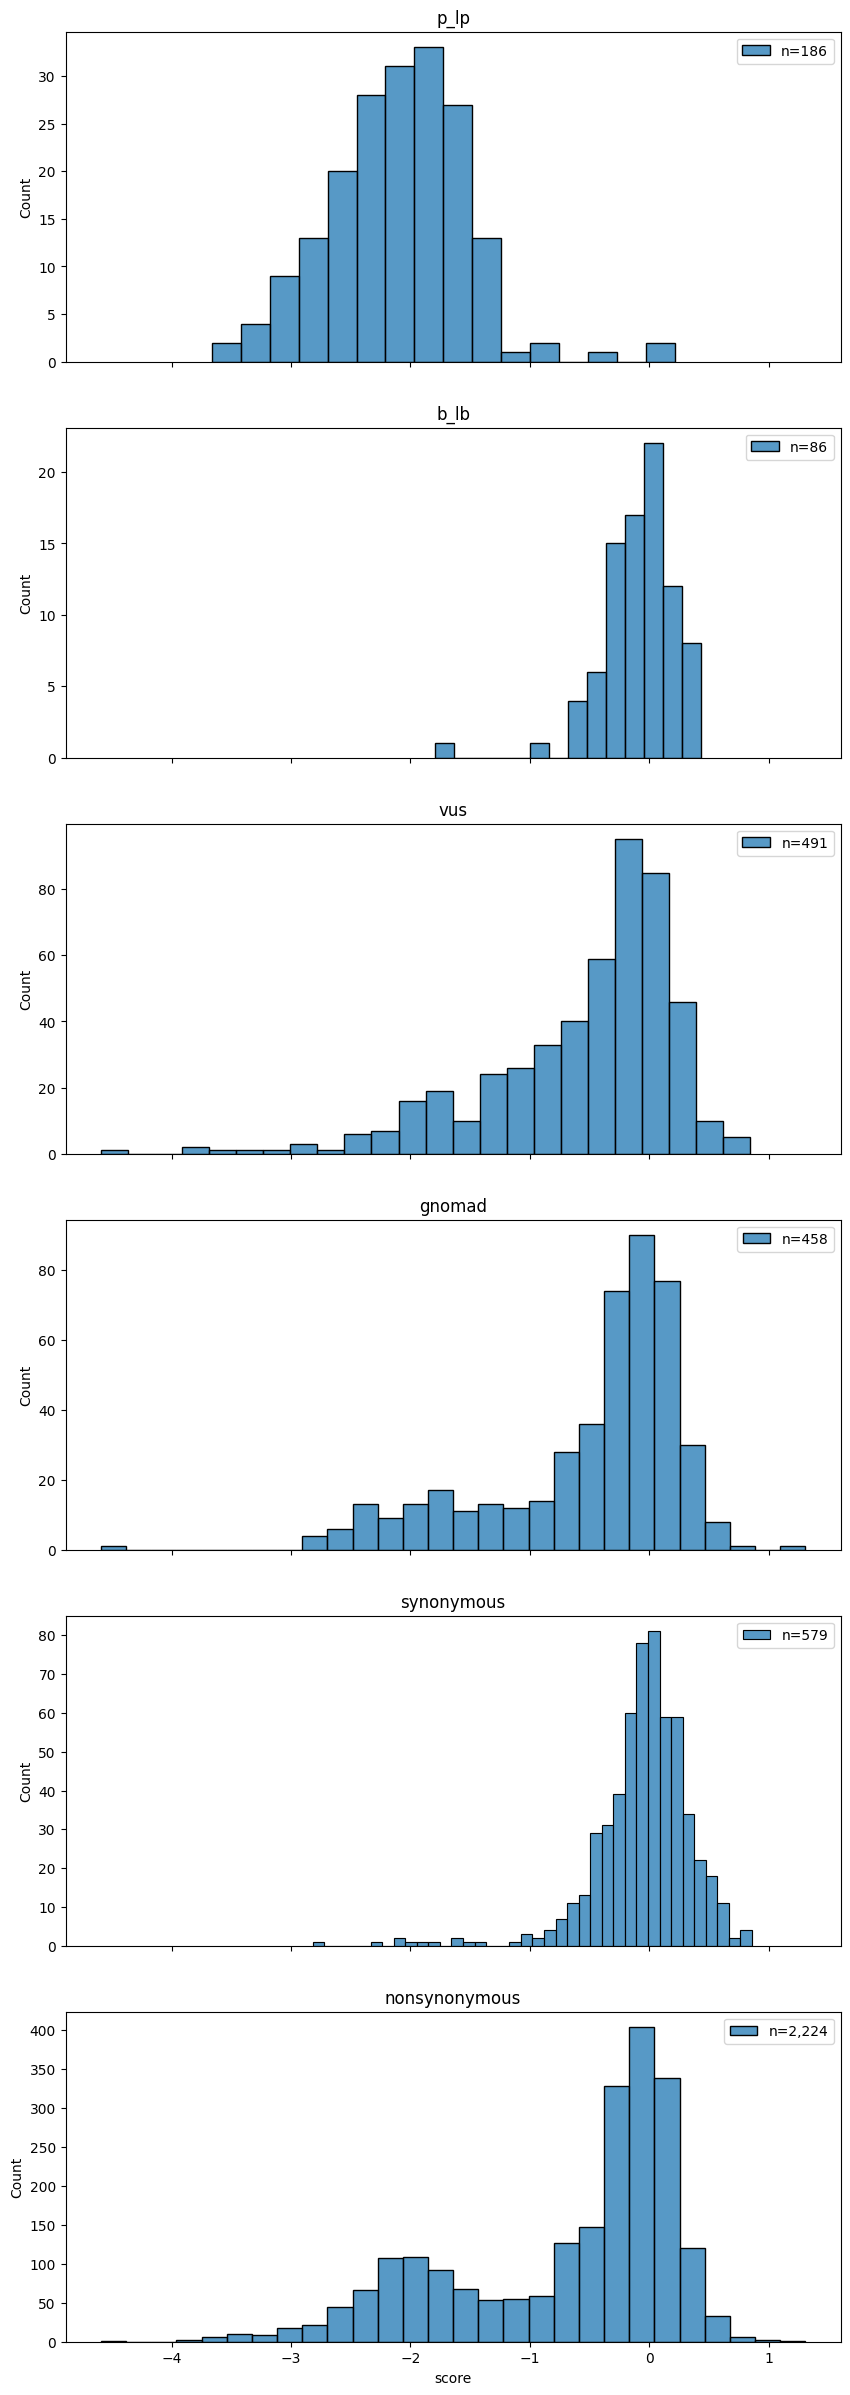

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(len(observations),1,figsize=(10,5*len(observations)),sharex=True,sharey=False)
for i,(sample_name,obs) in enumerate(observations.items()):
    sns.histplot(obs,ax=ax[i],label=f"n={len(obs):,d}")
    ax[i].set_title(f"{sample_name}")
    ax[i].legend()